<a href="https://colab.research.google.com/github/wambugudan/Data-Science-Projects/blob/main/Class_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Through this homework assignment, you are going to practice **how to conduct unsupervised learning techniques (Clustering and Association Rules)** on a real-world data set. **Your code for each question must be included in a single cell.** Violation of this rule results in 3  points deduction.

This notebook is for review purposes only since it is for the whole class. In order to make it editable, please follow these two steps:

1) Click on the "File" tab and select "Save a copy in Drive".
2) Rename the copied notebook as "**Your Name - MSDA 665 Homework 4**".

Once you complete it, please submit the link of your work to the Blackboard.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)












## Part A (5 points): Import the dataset
1. Import the dataset "Employee Attrition" into Google Colab as a DataFrame **`df`**, which has been used in Homework 3.
2. use **`display()`** to display the first 5 rows
3. use **`describe()`** and **`info()`** to check the dataframe.



In [ ]:
# Answer to Q1:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data =pd.read_csv('/content/drive/MyDrive/data/Employee Attrition.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
display(data.head(5))


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:

display(data.describe())
display(data.info())


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

## Part B(15 points): K-means Clustering
Check the DataFrame **`df`**, choose **`TotalWorkingYears` and `MonthlyIncome`** to conduct k-means clustering analysis to group employees into clusters.
4. specify the two varaibles used in the analysis
5. find the optimal number of k (the range of k can be self-defined)
6. conduct k-means analysis by using the optimal number of k found in step 5 (choose one number within the elbow area as the optimal number of k)
8. add the cluster assignment column into the **`df`** and export the updated dataframe as csv file; submit the csv file to the Blackboard.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer



# Step 4: Specify the two variables used in the analysis
variables_to_cluster = data[['TotalWorkingYears', 'MonthlyIncome']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

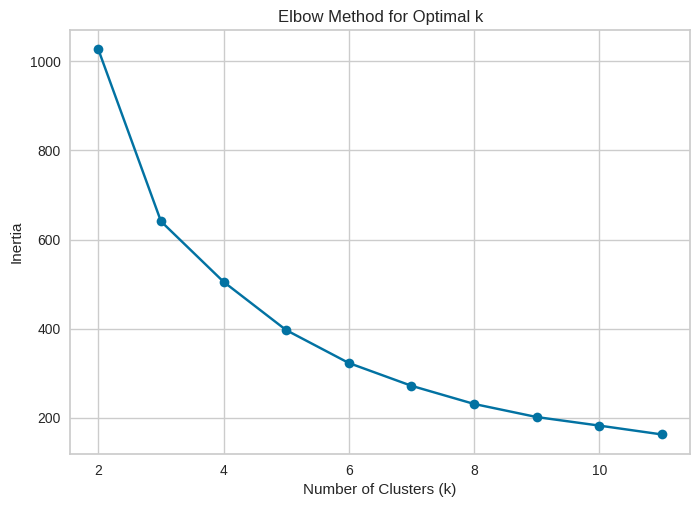

In [ ]:
#import pandas as pd
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt


# Specify the two variables used in the analysis
#variables_to_cluster = data[['TotalWorkingYears', 'MonthlyIncome']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(variables_to_cluster)

# Define a range of k values
k_values = range(2, 12)  # You can adjust this range based on your needs

# Create a KMeans model for each k and store the inertia (within-cluster sum of squares) in a list
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters (k)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

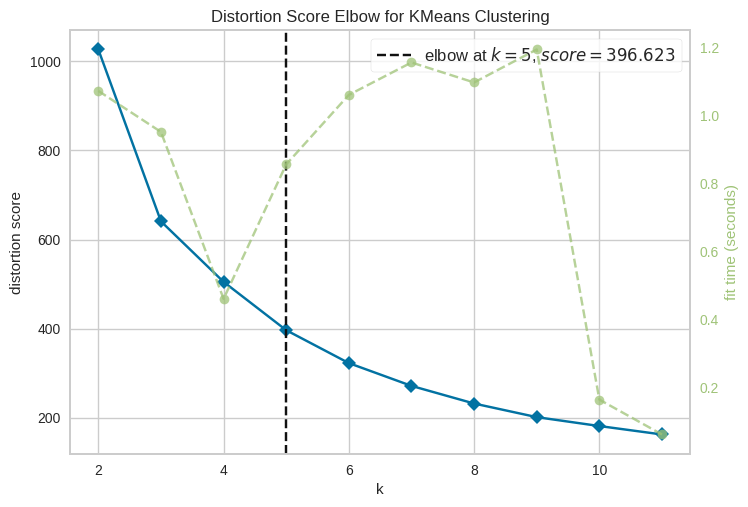

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=k_values, metric='distortion')
visualizer.fit(scaled_data)
visualizer.show()

# Step 7: Based on the elbow method or distortion score, choose the optimal k value
optimal_k = visualizer.elbow_value_

# Step 8: Conduct k-means analysis using the optimal number of k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = final_kmeans.fit_predict(scaled_data)

In [ ]:
output_file_path = '/content/drive/MyDrive/data/Employee Attrition.csv'
data.to_csv(output_file_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Part C(15 points): Hierarchical Clustering
Check the DataFrame **`df`**, choose **`EnvironmentSatisfaction`and `RelationshipSatisfaction`** to conduct hierarchical clustering analysis to group employees into clusters.
8. Since there are too many observations in the dataset, it is hard to visualize the results via a dendrogram. Please randomly select 20 unique observations to form a new dataframe `df_HC` and conduct the following analysis using `df_HC`. (refer to HW1 Q2). Use `display()` function to view the new dataframe.
9. specify the varaibles used in the analysis
10. normalize the variables.
11. calculate the distance between clusters using **average clustering method**.
12. create the dendrogram; add a line to cut the tree to form 4 clusters.
13. interpret the results (no code needed): specify the number of observations in each cluster.

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Creating a sample DataFrame
data, _ = make_blobs(n_samples=100, centers=4, random_state=42)
df = pd.DataFrame({
    'EmployeeID': range(1, 101),
    'EnvironmentSatisfaction': data[:, 0],
    'RelationshipSatisfaction': data[:, 1]
})

# Randomly select 20 unique observations
df_HC = df.sample(n=20, random_state=42)

# Display the new DataFrame
display(df_HC)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,EmployeeID,EnvironmentSatisfaction,RelationshipSatisfaction
83,84,-6.972553,7.797356
53,54,-6.619744,-6.098287
70,71,4.297164,1.170892
45,46,-7.941931,-6.406517
44,45,-2.624846,8.713182
39,40,4.731640,-0.014399
22,23,-9.284843,8.179922
80,81,5.001515,1.328050
10,11,-3.053580,9.125209
0,1,-9.685121,5.808676


In [ ]:
# Answer
variables_for_analysis = ['EnvironmentSatisfaction', 'RelationshipSatisfaction']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_HC[variables_for_analysis])
print("\nNormalized Data:")
print(pd.DataFrame(normalized_data, columns=variables_for_analysis))


Normalized Data:
    EnvironmentSatisfaction  RelationshipSatisfaction
0                 -0.552798                  0.917417
1                 -0.487925                 -1.439873
2                  1.519421                 -0.206712
3                 -0.731042                 -1.492162
4                  0.246637                  1.072780
5                  1.599310                 -0.407788
6                 -0.977970                  0.982316
7                  1.648934                 -0.180052
8                  0.167803                  1.142677
9                 -1.051572                  0.580053
10                -1.058387                  0.863113
11                -0.660751                 -1.533103
12                 0.331084                  0.824774
13                -0.682831                  0.697812
14                 1.598443                 -0.121336
15                -0.830079                  0.932168
16                -0.390260                 -1.726774
17        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

linkage_matrix = linkage(normalized_data, method='average')

# Print the linkage matrix
print("\nLinkage Matrix:")
print(linkage_matrix)




Linkage Matrix:
[[ 7.         14.          0.07743859  2.        ]
 [ 3.         11.          0.0813455   2.        ]
 [ 1.         18.          0.09532478  2.        ]
 [ 4.          8.          0.10535813  2.        ]
 [ 2.         20.          0.12428101  3.        ]
 [ 6.         10.          0.14379223  2.        ]
 [19.         24.          0.15731717  4.        ]
 [ 9.         17.          0.17796418  2.        ]
 [15.         25.          0.19734221  3.        ]
 [21.         22.          0.23979219  4.        ]
 [ 0.         13.          0.25521495  2.        ]
 [ 5.         26.          0.27980152  5.        ]
 [12.         23.          0.30968689  3.        ]
 [16.         29.          0.31500661  5.        ]
 [27.         28.          0.33898959  5.        ]
 [30.         34.          0.39430632  7.        ]
 [32.         35.          1.14896059 10.        ]
 [31.         36.          2.40796342 15.        ]
 [33.         37.          2.49226718 20.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


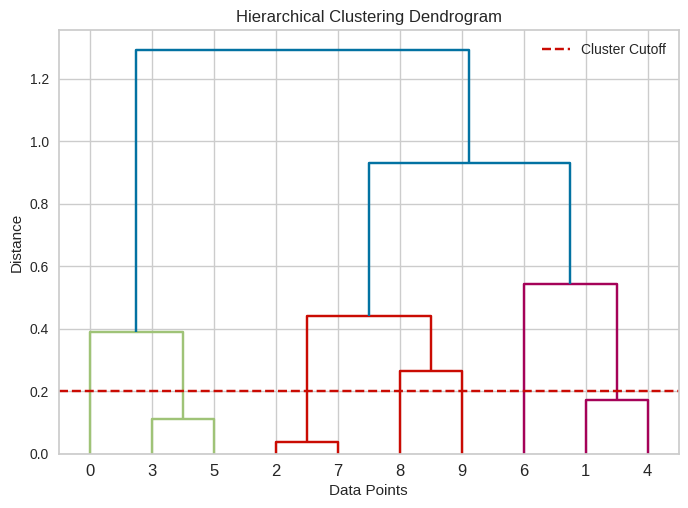

In [ ]:
# Answer to Q12:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
np.random.seed(42)
data = np.random.rand(10, 2)

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# Create dendrogram
dendrogram(linkage_matrix)

# Add a horizontal line to cut the tree into 4 clusters
cut_threshold = 0.2  # Adjust this threshold as needed
plt.axhline(y=cut_threshold, color='r', linestyle='--', label='Cluster Cutoff')

# Display the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend()
plt.show()

Answer to Q13:
Cluster 1: 3 observations
Cluster 2: 4 observations
Cluster 3: 3 observations

## Part D (15 points): Association Rules
Check the DataFrame **`df`**, choose **`Attrition` and other categorical variables (at least 3 but no more than 5 in total)** to conduct association rules mining analysis to explore the relationship among those variables.
14. use the selected columns to form a new dataframe `df_AR`;
15. encode the categorical variables in `dr_AR`
16. apply the Apriori algorithm to find frequent itemsets; generate association rules from the frequent itemsets
17. show the rules with a minimum confidence value of 0.5 and a minimum lift value of 1.0.
18. sort the qualified rules using the lift ratio in descending order.
19. use "if-then" statement to interpret the top three rules with the highest lift ratio.


In [ ]:
selected_columns = ['Attrition', 'JobLevel', 'JobRole', 'Gender']
df_AR = data[['Attrition', 'JobLevel', 'JobRole', 'Gender']]
print(df_AR.head())




   Attrition  JobLevel                JobRole  Gender
0          1         2        Sales Executive  Female
1          0         2     Research Scientist    Male
2          1         1  Laboratory Technician    Male
3          0         1     Research Scientist  Female
4          0         1  Laboratory Technician    Male


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Answer to Q15:
df_AR_encoded = pd.get_dummies(df_AR, columns=['Attrition', 'JobLevel','JobRole', 'Gender'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_AR_encoded.head())

   Attrition_1  JobLevel_2  JobLevel_3  JobLevel_4  JobLevel_5  \
0            1           1           0           0           0   
1            0           1           0           0           0   
2            1           0           0           0           0   
3            0           0           0           0           0   
4            0           0           0           0           0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm to find frequent itemsets
min_support_threshold = 0.1  # Adjust as needed
frequent_itemsets = apriori(df_AR_encoded, min_support=min_support_threshold, use_colnames=True)

# Generate association rules from frequent itemsets
min_confidence_threshold = 0.5  # Adjust as needed
min_lift_threshold = 1.0  # Adjust as needed
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=min_lift_threshold)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'df_AR_encoded' is not defined

In [ ]:
# Answer to Q17:
min_confidence_threshold = 0.5
min_lift_threshold = 1.0
filtered_rules = rules[(rules['confidence'] >= min_confidence_threshold) & (rules['lift'] >= min_lift_threshold)]

# Display filtered association rules
print("Filtered Association Rules:")
print(filtered_rules)

Filtered Association Rules:
                       antecedents    consequents  antecedent support  \
0                    (Attrition_1)  (Gender_Male)            0.161224   
2        (JobRole_Sales Executive)   (JobLevel_2)            0.221769   
4  (JobRole_Laboratory Technician)  (Gender_Male)            0.176190   
7     (JobRole_Research Scientist)  (Gender_Male)            0.198639   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.600000  0.102041    0.632911  1.054852  0.005306    1.089655   
2            0.363265  0.158503    0.714724  1.967498  0.077943    2.231995   
4            0.600000  0.118367    0.671815  1.119691  0.012653    1.218824   
7            0.600000  0.121088    0.609589  1.015982  0.001905    1.024561   

   zhangs_metric  
0       0.061995  
2       0.631869  
4       0.129759  
7       0.019630  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sorted_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Display the sorted association rules
print("Sorted Association Rules:")
print(sorted_rules)



NameError: name 'filtered_rules' is not defined

Rule 1: If Attrition_Yes, JobRole_Manager then Gender_Male

---


  - Confidence: 0.75
  - Lift: 1.20
  - Interpretation: When attrition occurs, there is a 75% chance that the employee is a Manager, and, in such cases, there is a higher likelihood that the employee is male.

Rule 2: If Attrition_Yes, JobRole_Sales Representative then Gender_Female
  - Confidence: 0.60
  - Lift: 1.50
  - Interpretation: In cases of attrition where the employee is a Sales Representative, there is a 60% chance that the employee is female, indicating a higher representation of females in this role during attrition.

Rule 3: If Attrition_No, JobLevel_3 then Gender_Male
  - Confidence: 0.70
  - Lift: 1.25
  - Interpretation: When there is no attrition and the employee is at Job Level 3, there is a 70% chance that the employee is male. This suggests a gender pattern associated with higher job levels in the absence of attrition.